<a href="https://colab.research.google.com/github/sasuraibito1125/google_colab/blob/main/%E3%82%B0%E3%83%A9%E3%83%95%E3%83%86%E3%83%B3%E3%83%97%E3%83%AC%E3%83%BC%E3%83%88%EF%BC%9A%E8%A4%87%E6%95%B0%E3%81%AE%E9%96%A2%E6%95%B0%E3%81%AE%E3%82%B0%E3%83%A9%E3%83%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## グラフテンプレート：複数の関数のグラフ

## 日本語対応

In [ ]:
#@title ##### 日本語対応 { vertical-output: true, display-mode: "form" }
# 日本語化モジュールインストール
!pip install -qq japanize-matplotlib

# 日本語化モジュールインポート
import japanize_matplotlib

## 関数定義

In [ ]:
#@title ##### 複数の関数のグラフの描画関数 { vertical-output: true, display-mode: "form" }
#@markdown 関数名: `draw_multiple_graphs`
#@markdown * 引数：`xmin`, `xmax`, `N`, `title`, `func`, `graph_values`
def draw_multiple_graphs(xmin, xmax, N, title, func, graph_values):
  '''複数のグラフの描画関数

  Parameters
  ----------
  xmin: 定義域の最小値
  xmax: 定義域の最大値
  N: 定義域のデータ数
  title: グラフタイトル
  func: 描画対象の関数
  graph_values: グラフ関連の値
    params: グラフのパラメタ
    linestyles: 線種
    labels: 凡例のラベル
  '''
  import matplotlib.pyplot as plt
  import numpy as np

  # 定義域
  x = np.linspace(xmin, xmax, N)

  # 値域
  r = np.array([func(x, gv['params']) for gv in graph_values])

  # 横軸(horizon)ゼロの太線化
  plt.axhline(0, linewidth=1, color='grey')

  # 縦軸(Vertical)ゼロの太線化
  plt.axvline(0, linewidth=1, color='grey')

  # グラフの範囲
  xdiff = (xmax - xmin) / 20
  ymin = r.min().min()
  ymax = r.max().max()
  ydiff = (ymax - ymin) / 20
  view_range = [xmin - xdiff, xmax + xdiff, ymin - ydiff, ymax + ydiff]

  # 表示範囲の設定
  plt.axis(view_range)

  # グラフのタイトルの設定
  plt.title(title)

  for y, gv in zip(r, graph_values):
    plt.plot(x, y, linestyle=gv['linestyle'], label=gv['label'])

  plt.legend()
  plt.show()


## 使用例

※ここで実行する場合は各使用例に対して以下の手順で行う
1. 使用例に対応する上記テンプレートモジュールの「日本語対応」セルを実行する
2. 使用例に対応する上記テンプレートモジュールの「関数定義」セルを実行する
3. 使用例に対応する下記の例のセルを実行する

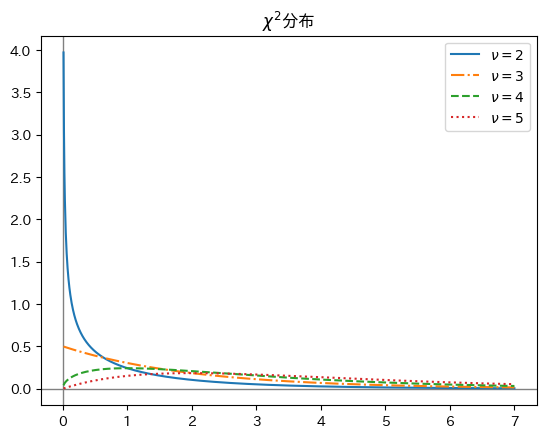

In [ ]:
#@title ##### 複数の関数のグラフの描画関数の使用例 { run: "auto", vertical-output: true, display-mode: "both" }
xmin = 0.01 #@param {type:"number"}
xmax = 7 #@param {type:"number"}
N = 1000 #@param {type:"integer"}

import numpy as np
from scipy.stats import chi2

# グラフ関連の値を生成する関数
def create_graph_values():
  # 自由度
  nu = np.arange(1, 5)

  linestyles = ['-', '-.', '--', ':']
  labels= [f'$\\nu = {i+1}$' for i in nu]

  return [{ 'params':p, 'linestyle': s, 'label': l }  for p, s, l in zip(nu, linestyles, labels)]

draw_multiple_graphs(xmin, xmax, N, '$\\chi^2$分布',
                     lambda d, k: chi2.pdf(d, k),
                     create_graph_values())